In [1]:
import pathlib
import os

import pandas as pd

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point

1、Here is the data about the node.

（1）Read node information from nodes.csv

In [5]:
allNodes = pd.read_csv('.../nodes.csv')
allNodes.head(15)

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba3b,AoT_Chicago,006,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),2017/08/08 00:00:00,NaN
2,001e0610f02f,AoT_Chicago,00A,Lake Shore Drive & Fullerton Ave Chicago IL,41.926261,-87.630758,AoT Chicago (S) [CA],2018/05/07 00:00:00,NaN
3,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),2017/08/08 00:00:00,NaN
4,001e0610ba16,AoT_Chicago,010,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],2018/07/18 00:00:00,NaN
5,001e06107e5d,AoT_Chicago,014,State St & Washington St Chicago IL,41.883205,-87.627769,AoT Chicago (T),2016/09/14 00:00:00,NaN
6,001e0610ba8b,AoT_Chicago,018,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN
7,001e0610ba13,AoT_Chicago,01C,7801 S Lawndale Ave Chicago IL,41.751238,-87.712990,AoT Chicago (S) [C] {ComEd},2018/01/01 00:00:00,NaN
8,001e0610ba18,AoT_Chicago,01D,Damen Ave & Cermak Chicago IL,41.852179,-87.675825,AoT Chicago (S),2017/12/15 00:00:00,NaN
9,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN


In [6]:
allNodes.lon

0     -87.627678
1     -87.616055
2     -87.630758
3     -87.590228
4     -87.710543
         ...    
121   -87.659467
122   -87.659467
123   -87.659467
124   -87.659467
125   -87.600008
Name: lon, Length: 126, dtype: float64

（2）According to the statistics, there are 126 pieces of data, and each data has 9 attributes.

In [7]:
allNodes.shape

(126, 9)

In [8]:
soundNodes = pd.read_csv('.../soundNodes.csv')
soundNodes.head(15)

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba13,AoT_Chicago,01C,7801 S Lawndale Ave Chicago IL,41.751238,-87.712990,AoT Chicago (S) [C] {ComEd},2018/01/01 00:00:00,NaN
2,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
3,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
4,001e0610bbe5,AoT_Chicago,02C,Martin Luther King Dr & 87th St Chicago IL,41.736495,-87.614529,AoT Chicago (S) [C],2018/02/16 00:00:00,NaN
5,001e0610ee36,AoT_Chicago,051,Cottage Grove Ave & 79th St Chicago IL,41.751295,-87.605288,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
6,001e0610ee5d,AoT_Chicago,056,Long Ave & Fullerton Ave Chicago IL,41.923996,-87.761072,AoT Chicago (S) [C],2018/02/23 00:00:00,NaN
7,001e06113ad8,AoT_Chicago,062,Ashland Ave & Roosevelt Rd Chicago IL,41.866786,-87.666306,AoT Chicago (S) [C],2018/02/27 00:00:00,NaN
8,001e0611441e,AoT_Chicago,067,Ashland Ave & 47th Chicago IL,41.808594,-87.665048,AoT Chicago (S) [C],2018/02/27 00:00:00,NaN
9,001e06112e77,AoT_Chicago,06B,Ashland Ave & 59th St Chicago IL,41.786756,-87.664343,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN


In [9]:
soundNodes.shape

(35, 9)

（1）Set global variables for shape files for Chicago streets and districts.

In [16]:
#
Chicago_Streets_Shapefiles = '.../street-chicago.shp'
Chicago_Boundary_Shapefile = '.../il-chicago.shp'

Text(0.5, 1.0, 'Spatial distrinution for AoT nodes in Chicago')

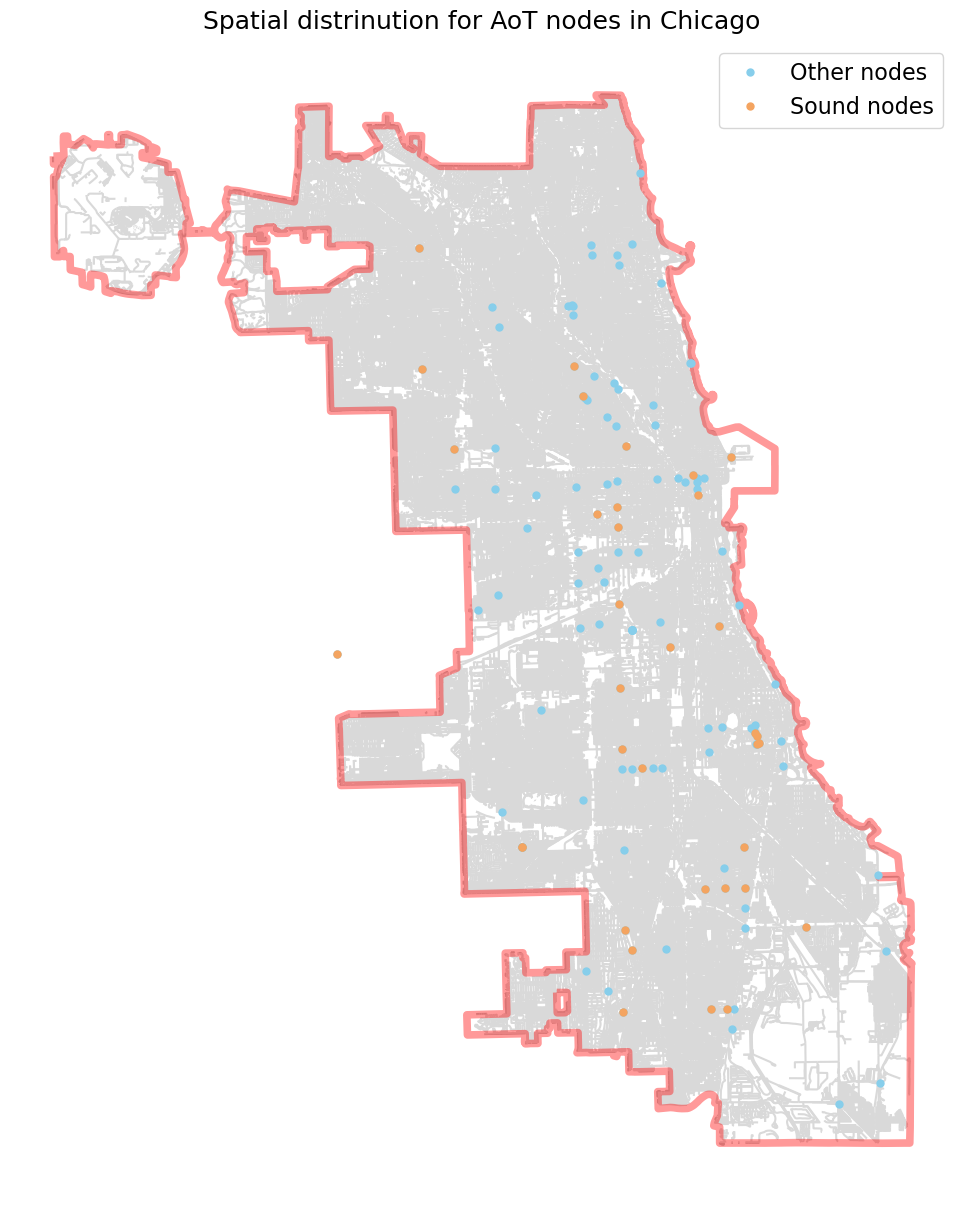

In [26]:
plt.style.use('default')

# Read street information
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)
f, ax = plt.subplots(1, figsize=(15, 15))

# Draw the streets of Chicago
streetmap.plot(ax=ax, color='silver', zorder = 0)

# Read boundary information
boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Draw the boundaries of Chicago
boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 5)

ax.plot(allNodes['lon'],allNodes['lat'], marker='o', color="skyblue",linestyle='', ms=5, zorder = 10,label="Other nodes")
ax.plot(soundNodes['lon'],soundNodes['lat'], marker='o', color="sandybrown",linestyle='', ms=5, zorder = 10,label="Sound nodes")

# ax.legend(), set legend
ax.legend(loc="upper right",fontsize=16)

# Turn off the X and Y axes
ax.set_axis_off()
ax.set_title('Spatial distrinution for AoT nodes in Chicago', fontsize = 18, fontdict = {'verticalalignment':'bottom'})
